In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('C:\\Users\\kchandrakant\\Downloads\\CIF.xlsx')

In [3]:
data = data.iloc[1:,1:]
data.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
1,206.1,113.42,59.71,50,104.37
2,208.62,116.29,60.42,50.93,106.36
3,206.79,114.51,61.12,50.11,104.86
4,205.97,114.34,61.16,47.89,101.53
5,206.7,115.33,61.27,46.69,99.8


In [4]:
data1 = data.iloc[1:,:]
d1 = data1.values
data2 = data.iloc[:len(data.index)-1,:]
d2 = data2.values
lr = np.log((d2/d1).astype('float64'))

In [5]:
returns = lr.mean(axis=0)
volatility = lr.std(axis=0)
cov_matrix = np.cov(lr.T)

In [9]:
num_portfolios = 10000
num_stocks = 5
num_trading_days = 252

In [10]:
results_restricted = np.zeros((2,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)
    results_restricted[0,i] = np.sum(returns*weights)*num_trading_days
    results_restricted[1,i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(num_trading_days)

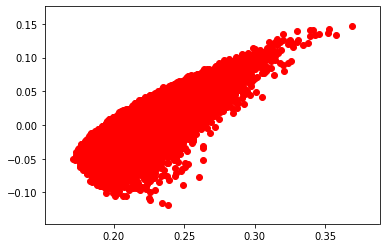

In [11]:
plt.scatter(results_restricted[1,:], results_restricted[0,:], color='r')
plt.show()

In [12]:
results_unrestricted = np.zeros((2,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.uniform(-1,1,num_stocks)
    weights /= np.sum(weights)
    results_unrestricted[0,i] = np.sum(returns*weights)*num_trading_days
    results_unrestricted[1,i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(num_trading_days)

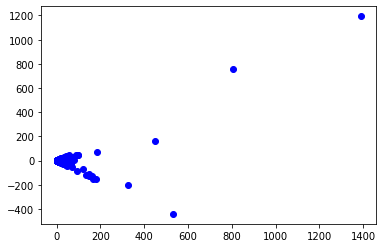

In [13]:
plt.scatter(results_unrestricted[1,:], results_unrestricted[0,:], color='b')
plt.show()

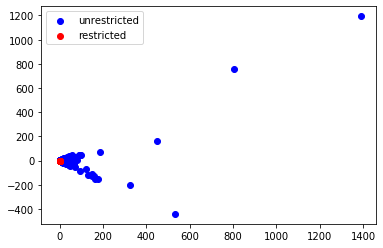

In [14]:
plt.scatter(results_unrestricted[1,:], results_unrestricted[0,:], color='b', label='unrestricted')
plt.scatter(results_restricted[1,:], results_restricted[0,:], color='r', label='restricted')
plt.legend(loc='upper left');
plt.show()